<a href="https://colab.research.google.com/github/msubhikshaT/Codsoft-Task2_Movie/blob/main/CODSOFT_T_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.shape

(15509, 10)

In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
Q1=4.900000
Q3=6.800000
IQR=Q3-Q1
IQR

1.8999999999999995

In [8]:
lower_limb=Q1-(1.5*IQR)

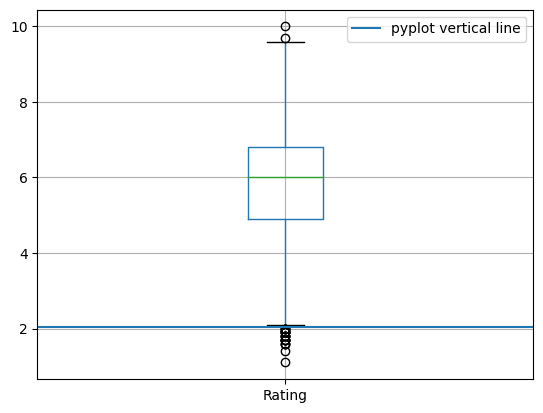

In [9]:
boxplot = df.boxplot(column=['Rating'])
lower_limb=Q1-(1.5*IQR)
plt.axhline(lower_limb,  label='pyplot vertical line')
plt.legend()

In [10]:
df.dropna(subset=['Rating','Year'], inplace=True)

In [11]:
df['Rating']

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

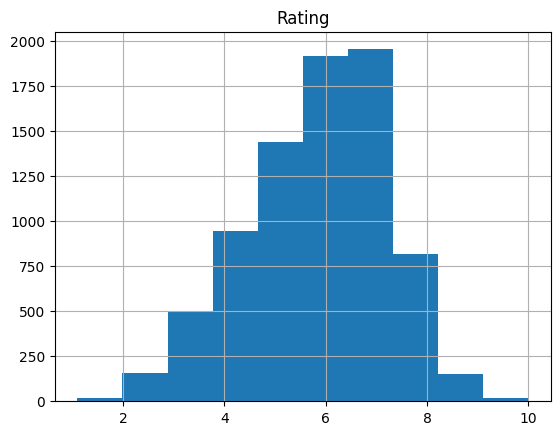

In [12]:
df.hist(column=['Rating'])

In [13]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       nan, 'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Come

In [14]:
df['Rating'].max()

10.0

In [15]:
df.loc[df['Rating']==df['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [16]:
df.loc[(df['Rating'].min()==df['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [17]:
df['Votes']=df['Votes'].str.replace(",","")

In [18]:
df['Votes']=df['Votes'].astype(int)

In [19]:
df['Votes'].dtypes

dtype('int64')

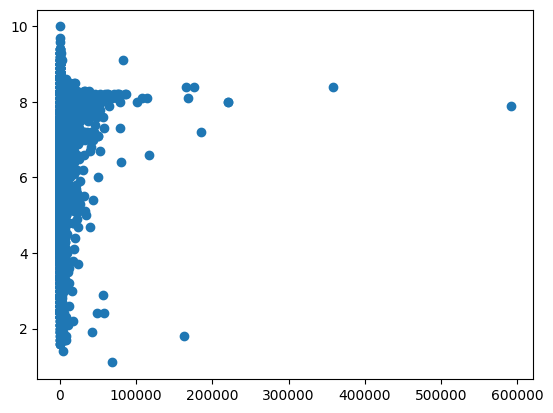

In [20]:
plt.scatter(df["Votes"],df["Rating"])
plt.show()

<ipython-input-21-842e023cb4df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.Votes, hist=False)


<Axes: xlabel='Votes', ylabel='Density'>

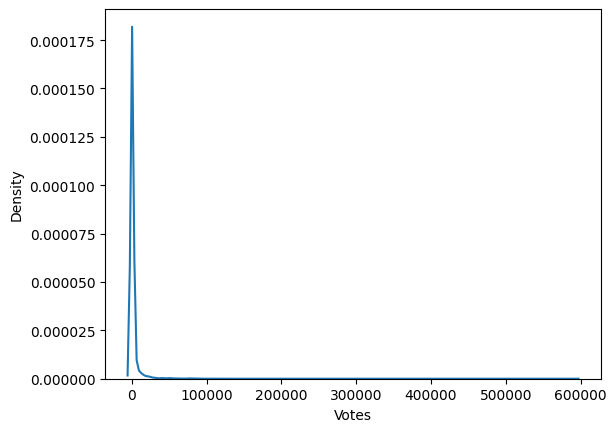

In [21]:
sns.distplot(a=df.Votes, hist=False)

In [22]:
df.dropna(subset=['Genre'], inplace=True)
df=df.reset_index()
df.head()

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7817 entries, 0 to 7816
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     7817 non-null   int64  
 1   Name      7817 non-null   object 
 2   Year      7817 non-null   object 
 3   Duration  5820 non-null   object 
 4   Genre     7817 non-null   object 
 5   Rating    7817 non-null   float64
 6   Votes     7817 non-null   int64  
 7   Director  7812 non-null   object 
 8   Actor 1   7707 non-null   object 
 9   Actor 2   7641 non-null   object 
 10  Actor 3   7558 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 671.9+ KB
